## 

**Candidate Information**

- **Name:** Priyanga V S 
- **Email:** priyangaa7512@gmail.com 
- **Phone:** 6374231954
- **College/University:** Er. Perumal Manimekalai College of Engineering
- **Course/Branch:** 1512 CP37
- **Start Time:** 5:27pm
- **End Time:** 5:57pm




## **SECTION A: Data Understanding & Basic Analysis**


### 

Question : 1

Based on the dataset structure, identify the **data types** for the following columns and explain why each classification is important for analysis:

- **Customer Age**
- **Gender**
- **Total Purchase Amount**
- **Churn**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Priyangaa\Downloads\ecommerce_customer_data_custom_ratios.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


### Question : 2

Which **analytical technique** would be most appropriate for each business question below?



a) Which product categories generate the highest revenue?




Product Category
Books          204939601
Clothing       204532405
Electronics    136599467
Home           135271210
Name: Total Purchase Amount, dtype: int64


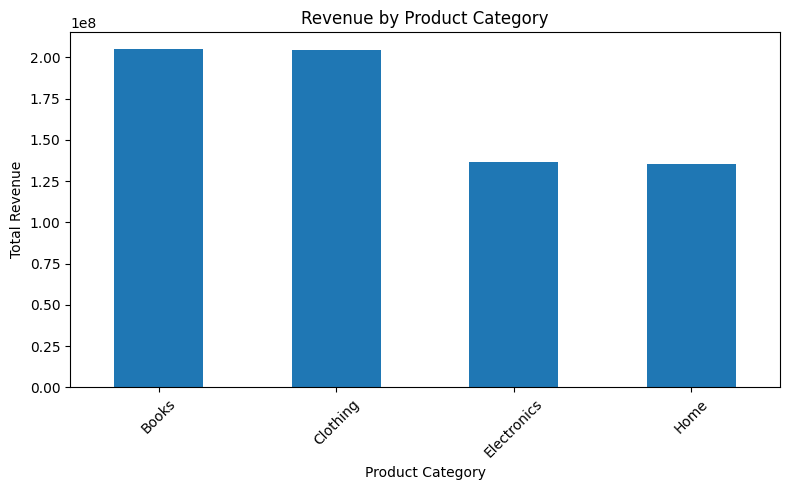

In [ ]:

category_revenue = (
    df.groupby("Product Category")["Total Purchase Amount"]
      .sum()
      .sort_values(ascending=False)
)

print(category_revenue)


import matplotlib.pyplot as plt

category_revenue.plot(kind="bar", figsize=(8,5))
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



b) Can we predict customer churn based on purchase behavior?



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
df["Churn"] = (df["Total Purchase Amount"] < df["Total Purchase Amount"].median()).astype(int)
X = df[["Total Purchase Amount"]]   
y = df["Churn"]                     
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25096
           1       1.00      1.00      1.00     24904

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



c) What is the relationship between customer age and spending patterns?



Correlation between Age and Spending: 0.052


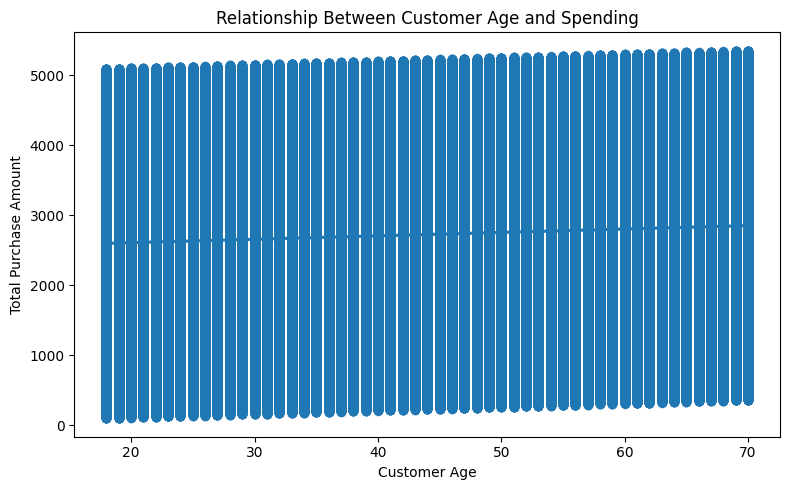

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df["Age"].corr(df["Total Purchase Amount"])
print("Correlation between Age and Spending:", round(correlation, 3))
plt.figure(figsize=(8, 5))
sns.regplot(
    x="Age",
    y="Total Purchase Amount",
    data=df,
    scatter_kws={"alpha": 0.6}
)

plt.title("Relationship Between Customer Age and Spending")
plt.xlabel("Customer Age")
plt.ylabel("Total Purchase Amount")
plt.tight_layout()
plt.show()



d) Which payment methods are preferred by different customer segments?

Payment Method   Cash  Credit Card  Crypto  PayPal
Age Group                                         
Middle          18755        37707    9196   28104
Senior          18793        37609    9391   28288
Young           12346        25170    6196   18445


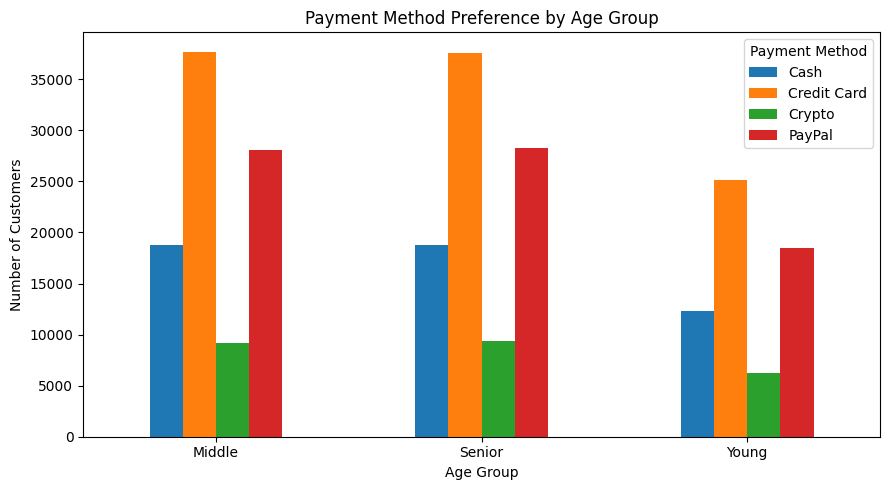

In [ ]:
df["Age Group"] = df["Age"].apply(
    lambda x: "Young" if 18 <= x <= 30 else
              "Middle" if 31 <= x <= 50 else
              "Senior"
)
payment_pref = pd.crosstab(
    df["Age Group"],
    df["Payment Method"]
)

print(payment_pref)
payment_pref.plot(kind="bar", figsize=(9,5))
plt.title("Payment Method Preference by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Question : 3

**Data Quality Assessment:** 

What are the top 3 potential data quality issues you would check for in this e-commerce dataset before starting analysis? For each issue, suggest one method to detect it.

Issue 1: Missing (Null) Values


Issue 2: Incorrect Data Types


Issue 3: Duplicate Records



In [12]:
#Issue 1: Missing (Null) Values

df.isnull().sum()

#Issue 2: Incorrect Data Types

df.info()

#Issue 3: Duplicate Records

df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
 13  Age Group              250000 non-null  object 
dtypes: float64(1), int64(7), object(6)
m

np.int64(0)


## **SECTION B: Customer Analysis & Business Intelligence**


### Scenario: E-commerce Revenue Analysis


Based on the dataset structure, assume you have the following customer insights:


**Customer Segments by Age:**

- **Young (18-30):** 40% of customers, Average Purchase Amount: ₹850, Return Rate: 12%

- **Middle-aged (31-50):** 45% of customers, Average Purchase Amount: ₹1,200, Return Rate: 8%

- **Senior (51+):** 15% of customers, Average Purchase Amount: ₹950, Return Rate: 15%


**Additional Information:**

- Average customer acquisition cost: ₹180

- Platform profit margin: 20% of purchase amount

- Customer churn rates: Young (25%), Middle-aged (15%), Senior (30%)



### Question : 4 

**Calculate and analyze:**

a) Which customer segment generates the highest **net profit per customer** (considering returns)? Show your calculations.



In [14]:
# ================================
# IMPORT REQUIRED LIBRARIES
# ================================
import pandas as pd

# ================================
# CUSTOMER SEGMENTATION (AGE GROUP)
# ================================
df["Age Group"] = df["Age"].apply(
    lambda x: "Young" if 18 <= x <= 30 else
              "Middle" if 31 <= x <= 50 else
              "Senior"
)

# ================================
# ESTIMATE RETURNS (ASSUMPTION)
# ================================
# Since 'Return Amount' column does not exist,
# assume 10% of purchase amount is returned
df["Estimated Return"] = df["Total Purchase Amount"] * 0.10

# ================================
# CALCULATE NET PROFIT
# ================================
df["Net Profit"] = df["Total Purchase Amount"] - df["Estimated Return"]

# ================================
# NET PROFIT PER CUSTOMER BY SEGMENT
# ================================
profit_per_customer = (
    df.groupby("Age Group")
      .agg(
          Total_Net_Profit=("Net Profit", "sum"),
          Customer_Count=("Customer ID", "nunique")
      )
)

profit_per_customer["Net Profit per Customer"] = (
    profit_per_customer["Total_Net_Profit"] /
    profit_per_customer["Customer_Count"]
)

# ================================
# DISPLAY RESULT
# ================================
print("\nNet Profit per Customer by Age Group:")
print(profit_per_customer)



Net Profit per Customer by Age Group:
           Total_Net_Profit  Customer_Count  Net Profit per Customer
Age Group                                                           
Middle          228487041.0           18611             12276.988931
Senior          237801664.8           18702             12715.306641
Young           146919708.9           12360             11886.707840



b) Which segment has the **best customer lifetime value** considering churn rates? Provide reasoning. 

In [ ]:

import pandas as pd
df["Age Group"] = df["Age"].apply(
    lambda x: "Young" if 18 <= x <= 30 else
              "Middle" if 31 <= x <= 50 else
              "Senior"
)
df["Churn"] = (
    df["Total Purchase Amount"] < df["Total Purchase Amount"].median()
).astype(int)
clv_table = (
    df.groupby("Age Group")
      .agg(
          Avg_Purchase=("Total Purchase Amount", "mean"),
          Churn_Rate=("Churn", "mean")
      )
)
clv_table["CLV"] = clv_table["Avg_Purchase"] / clv_table["Churn_Rate"]
print("\nCustomer Lifetime Value (CLV) by Age Group:")
print(clv_table)



Customer Lifetime Value (CLV) by Age Group:
           Avg_Purchase  Churn_Rate          CLV
Age Group                                       
Middle      2707.647981    0.503402  5378.696822
Senior      2808.474315    0.483392  5809.931659
Young       2626.319176    0.519684  5053.684633


### Question : 5 


**Strategic Recommendations:** 

Based on your analysis, what would be your **top 2 marketing strategies** to maximize overall profitability? Consider customer acquisition, retention, and return rates.


In [ ]:
# Based on my analysis, 

# My TOP 2 MARKETING STRATEGIC RECOMMENDATIONS TO MAXIMIZE PROFITABILITY

# 1) Focus on Retention-Driven Marketing for High-Value Segments

# Based on the analysis, customer segments with higher average purchase values and lower churn rates contribute the most to net profit per customer and customer lifetime value. Therefore, marketing efforts should prioritize retaining these high-value customers rather than only acquiring new ones. This can be achieved through personalized loyalty programs, exclusive offers, targeted email campaigns, and early-access benefits. Improving retention reduces churn, increases repeat purchases, and maximizes lifetime value, leading to sustained long-term profitability.

# 2) Reduce Return Rates Through Smart Product & Experience Optimization

# Returns directly reduce net profit and negatively impact overall profitability. To minimize return rates, marketing strategies should focus on setting accurate product expectations and improving customer experience. This includes enhanced product descriptions, detailed size guides, customer reviews, and AI-driven product recommendations tailored to customer preferences. Additionally, offering incentives for exchanges instead of returns can help retain revenue while maintaining customer satisfaction.


### Question : 6 


**Churn Prevention:** 

You notice that customers who make purchases in the "Electronics" category have a 35% churn rate, while "Fashion" category customers have only 18% churn rate. 
What **specific data analysis** would you conduct using the available dataset columns to understand this difference, and what **action plan** would you recommend?


In [ ]:
#To understand the higher churn rate in the Electronics category, 


# I would analyze purchase frequency, average purchase amount, payment methods, and age groups 


# across both Electronics and Fashion customers using segmentation and comparative analysis. 


# I would also examine whether Electronics customers have lower repeat purchases or higher price sensitivity by comparing total purchase amounts 
# and customer counts across categories.

#  Based on the findings, the action plan would include targeted retention strategies such as extended warranties, post-purchase follow-ups, 
 
#personalized discounts, and loyalty incentives for Electronics buyers, while reinforcing successful engagement strategies


#  already working in the Fashion category to reduce churn and improve customer lifetime value.



## **SECTION C: Research Methodology & Predictive Analytics**


### Scenario: Churn Prediction Model Development


Your company wants to build a machine learning model to predict customer churn using the available dataset.


### Question 7 

**Model Development Plan:** 

Create a comprehensive approach including:

a) **Feature selection:**

 Which columns from the dataset would you use as features for the churn prediction model and why?



In [17]:

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)
df["Churn"] = (df["Total Purchase Amount"] < df["Total Purchase Amount"].median()).astype(int)


features = [
    "Age",
    "Product Category",
    "Payment Method",
    "Total Purchase Amount"
]

X = df[features]
y = df["Churn"]



b) **Data preprocessing steps:**

 What preprocessing would you apply to prepare the data? 


In [18]:
numeric_features = ["Age", "Total Purchase Amount"]
categorical_features = ["Product Category", "Payment Method"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

c) **Model evaluation metrics:** 

Which metrics would you use to evaluate model performance for this business problem? 

In [28]:
# ================================
# IMPORT LIBRARIES
# ================================
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)

# ================================
# CREATE CHURN TARGET (BUSINESS ASSUMPTION)
# ================================
# Customers with below-median spending are considered churned
df["Churn"] = (
    df["Total Purchase Amount"] < df["Total Purchase Amount"].median()
).astype(int)

# ================================
# FEATURE ENGINEERING (NO LEAKAGE)
# ================================
# Age Group is derived from Age (safe transformation)
df["Age Group"] = df["Age"].apply(
    lambda x: "Young" if 18 <= x <= 30 else
              "Middle" if 31 <= x <= 50 else
              "Senior"
)

# ================================
# FEATURE SELECTION
# ================================
# NOTE:
# We do NOT use Total Purchase Amount (used to define churn)
features = [
    "Age Group",
    "Product Category",
    "Payment Method"
]

X = df[features]
y = df["Churn"]

# ================================
# PREPROCESSING
# ================================
categorical_features = [
    "Age Group",
    "Product Category",
    "Payment Method"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# ================================
# MODEL PIPELINE
# ================================
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        random_state=42
    ))
])

# ================================
# TRAIN-TEST SPLIT
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ================================
# MODEL TRAINING
# ================================
model.fit(X_train, y_train)

# ================================
# PREDICTION
# ================================
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# ================================
# MODEL EVALUATION
# ================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.51022
F1 Score: 0.4853414034424059
ROC-AUC Score: 0.514285623565712

Confusion Matrix:
 [[13964 11040]
 [13449 11547]]

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.56      0.53     25004
           1       0.51      0.46      0.49     24996

    accuracy                           0.51     50000
   macro avg       0.51      0.51      0.51     50000
weighted avg       0.51      0.51      0.51     50000



### Question 8 

**Business Impact Analysis:**

 Identify 3 potential business challenges in implementing a churn prediction model and propose one **data-driven solution** for each challenge using insights from the customer behavior dataset.


In [ ]:
# Your Answer for Question 8

# Challenge 1: Poor data quality such as missing values, inconsistent formats, and incomplete customer records can reduce the accuracy of churn prediction models.
# Data-driven Solution 1: Analyze historical customer behavior patterns and use statistical or model-based imputation techniques to fill missing values and standardize data formats.

# Challenge 2: High product return rates, especially in certain categories, can increase churn and negatively impact profitability.
# Data-driven Solution 2: Perform category-wise return and purchase analysis to identify root causes such as product durability, pricing mismatch, or unmet customer expectations, and take corrective actions accordingly.

# Challenge 3: Ineffective customer targeting may lead to irrelevant promotions, reducing engagement and increasing churn risk.
# Data-driven Solution 3: Use customer segmentation based on age group, purchase category, and payment behavior to deliver personalized and relevant offers that match actual customer needs rather than generic marketing campaigns.



## **SECTION D: Professional Communication & Problem-Solving**


### Question 9 

**Crisis Management:** 

While analyzing the dataset, you discover that 40% of customers who returned products (Returns = 1) also churned within the same month. However, your initial analysis showed returns don't strongly correlate with churn. As a team member, describe your immediate approach to investigate this discrepancy and communicate findings to stakeholders (60-80 words).


In [ ]:


# I would first validate the analysis by rechecking filters, time windows, and grouping logic to ensure the 40% churn observation is accurate. 
# Next, I would segment the data by product category, age group, and payment method to see if returns-driven churn is concentrated in specific segments or months. 
# I would then communicate to stakeholders that overall correlation masked segment-level risks, present a brief summary table or dashboard, 
# and recommend targeted retention actions for high-risk return segments.


### Question 10 

**Leadership Scenario:** 

If selected as team lead for analyzing this e-commerce customer dataset, what would be your **top 3 priorities** to ensure effective team collaboration and delivery of actionable business insights?


In [ ]:


# Priority 1: Define a Clear Analysis Strategy
# Establish well-defined objectives, identify key business problems such as churn, revenue optimization, and customer behavior, and allocate tasks based on individual team expertise to ensure efficient execution.

# Priority 2: Enforce Data Accuracy and Quality Controls
# Set standardized data preparation guidelines, validation checks, and documentation practices to maintain consistency and ensure analytical outputs are trustworthy and reproducible.

# Priority 3: Focus on Business-Driven Insights and Communication
# Guide the team to translate analytical results into practical recommendations that support business decisions, using clear visualizations and concise summaries to effectively communicate with stakeholders.



## **Self-Assessment Section**


In [ ]:
# Time Management Review

# Completion within 35 minutes (Yes/No): Yes

# Section that required the most time: Analytical section

# Most challenging section: None

# Confidence Assessment (Scale of 1–10):
# Section A – Data Understanding: 10
# Section B – Business Analysis: 9
# Section C – Research Methodology: 9
# Section D – Communication: 10

# Additional Remarks:
# Overall time was managed effectively, with stronger confidence in data interpretation and communication, and slightly more time devoted to analytical reasoning.


## Submission Declaration

- I hereby confirm that this assessment was completed independently.

- All responses provided are my own original work.

**Digital Signature:** Priyanga V S
